## FINANCIAL ANALYSIS (OPEN-SOURCE PROJECT) 

In [8]:
#importing the  required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:
#Reading the dataset
df = pd.read_csv('https://media.githubusercontent.com/media/HamoyeHQ/11-financial-products/master/data/consumer_complaints.csv')

C:\Users\MAYBUG\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (5,11) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [11]:
#A peep into the dataset
df.head()

,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id
0,08/30/2013,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,U.S. Bancorp,CA,95993,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511074
1,08/30/2013,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,Wells Fargo & Company,CA,91104,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511080
2,08/30/2013,Credit reporting,NaN,Incorrect information on credit report,Account status,NaN,NaN,Wells Fargo & Company,NY,11764,NaN,NaN,Postal mail,09/18/2013,Closed with explanation,Yes,No,510473
3,08/30/2013,Student loan,Non-federal student loan,Repaying your loan,Repaying your loan,NaN,NaN,"Navient Solutions, Inc.",MD,21402,NaN,NaN,Email,08/30/2013,Closed with explanation,Yes,Yes,510326
4,08/30/2013,Debt collection,Credit card,False statements or representation,Attempted to collect wrong amount,NaN,NaN,Resurgent Capital Services L.P.,GA,30106,NaN,NaN,Web,08/30/2013,Closed with explanation,Yes,Yes,511067


In [12]:
#checking the number of rows and columns
df.shape

(555957, 18)

In [18]:
#getting the information of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555957 entries, 0 to 555956
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   date_received                 555957 non-null  object
 1   product                       555957 non-null  object
 2   sub_product                   397635 non-null  object
 3   issue                         555957 non-null  object
 4   sub_issue                     212622 non-null  object
 5   consumer_complaint_narrative  66806 non-null   object
 6   company_public_response       85124 non-null   object
 7   company                       555957 non-null  object
 8   state                         551070 non-null  object
 9   zipcode                       551452 non-null  object
 10  tags                          77959 non-null   object
 11  consumer_consent_provided     123458 non-null  object
 12  submitted_via                 555957 non-null  object
 13 

In [25]:
#checking for missing values
df.isna().sum()

date_received                        0
product                              0
sub_product                     158322
issue                                0
sub_issue                       343335
consumer_complaint_narrative    489151
company_public_response         470833
company                              0
state                             4887
zipcode                           4505
tags                            477998
consumer_consent_provided       432499
submitted_via                        0
date_sent_to_company                 0
company_response_to_consumer         0
timely_response                      0
consumer_disputed?                   0
complaint_id                         0
dtype: int64

In [26]:
#dropping the columns with no data input
df.dropna(how='all', axis=1, inplace=True)

In [27]:
df.head()

,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id
0,08/30/2013,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,U.S. Bancorp,CA,95993,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511074
1,08/30/2013,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,Wells Fargo & Company,CA,91104,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511080
2,08/30/2013,Credit reporting,NaN,Incorrect information on credit report,Account status,NaN,NaN,Wells Fargo & Company,NY,11764,NaN,NaN,Postal mail,09/18/2013,Closed with explanation,Yes,No,510473
3,08/30/2013,Student loan,Non-federal student loan,Repaying your loan,Repaying your loan,NaN,NaN,"Navient Solutions, Inc.",MD,21402,NaN,NaN,Email,08/30/2013,Closed with explanation,Yes,Yes,510326
4,08/30/2013,Debt collection,Credit card,False statements or representation,Attempted to collect wrong amount,NaN,NaN,Resurgent Capital Services L.P.,GA,30106,NaN,NaN,Web,08/30/2013,Closed with explanation,Yes,Yes,511067


In [28]:
df.shape

(555957, 18)

In this EDA, we'll be treating three issues basically;

        i. Time between response
        
        ii. The best organization or company during holiday period
        
        iii The location with the highest complaints and the reason(s)

In [89]:
#1. TIME BETWEEN RESPONSE

#to treat the first issue, we'll begin by converting the necessary columns to datetime
from datetime import datetime

df['date_sent_to_company']= pd.to_datetime(df['date_sent_to_company'])
df['date_received']= pd.to_datetime(df['date_received'])
df['date_sent_to_company'].value_counts(bins=10)

(2015-06-08 14:24:00, 2015-11-16 07:12:00]              79032
(2014-12-29 21:36:00, 2015-06-08 14:24:00]              72244
(2015-11-16 07:12:00, 2016-04-25]                       70660
(2014-02-11 12:00:00, 2014-07-22 04:48:00]              69848
(2014-07-22 04:48:00, 2014-12-29 21:36:00]              65069
(2013-09-03 19:12:00, 2014-02-11 12:00:00]              54890
(2013-03-27 02:24:00, 2013-09-03 19:12:00]              45762
(2012-10-17 09:36:00, 2013-03-27 02:24:00]              39878
(2012-05-09 16:48:00, 2012-10-17 09:36:00]              36821
(2011-11-29 09:25:55.199999999, 2012-05-09 16:48:00]    21753
Name: date_sent_to_company, dtype: int64

In [59]:
df['year_received'] = pd.DatetimeIndex(df['']).year
df['month_received'] = pd.DatetimeIndex(df['date_received']).month

In [83]:
#df['company'].value_counts()

N:B. You can help in finishing the analysis on the time response because I got a bit confused at this point, so I'm moving over to the next analyzing which is getting the best company or organization during holiday,

In [32]:
# 3. STATE WITH THE HIGHEST NUMBER OF COMPLAINTS

#to check the summary statistics of the state column
df['state'].describe()

count     551070
unique        62
top           CA
freq       81700
Name: state, dtype: object

Text(0.5, 1.0, 'Number of complaints for each state')

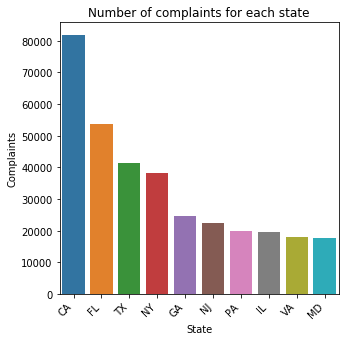

In [33]:
#  To view the state with the highest number of complaints on a plot

plot_order = df.groupby(['state'])['complaint_id'].count().sort_values(ascending=False).index.values
plt.figure(figsize=(5,5))
chart = sns.countplot(data=df, x='state',order=plot_order[0:10])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
chart.set_ylabel('Complaints')
chart.set_xlabel('State')
chart.set_title('Number of complaints for each state')

From the above chart,we can see that companies within the State of CA (Califonia) have the highest number of complaints but why? Could it be that California has a  larger amount companies present in the dataset?